# Material Backorder prediction_EDA


## 1.Importing Libraries 

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.The Dataset

In [ ]:
!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://colab.research.google.com/" "https://raw.githubusercontent.com/rodrigosantis1/backorder_prediction/58e81b4a1ac67db3605456a5fedfe40eaa9d76ad/dataset.rar" -c -O 'dataset.rar'

--2021-10-30 05:44:43--  https://raw.githubusercontent.com/rodrigosantis1/backorder_prediction/58e81b4a1ac67db3605456a5fedfe40eaa9d76ad/dataset.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24741696 (24M) [application/octet-stream]
Saving to: ‘dataset.rar’

dataset.rar         100%[===================>]  23.59M  --.-KB/s    in 0.1s    

2021-10-30 05:44:44 (180 MB/s) - ‘dataset.rar’ saved [24741696/24741696]



In [ ]:
! unrar x '/content/dataset.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/dataset.rar

Extracting  Kaggle_Training_Dataset_v2.csv                                 0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87%  OK 
Extracting  Kaggle_Test_Dataset_v2.csv                                    87% 88% 89% 90%

In [ ]:
#data
data=pd.read_csv('/content/Kaggle_Training_Dataset_v2.csv')
print(data.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1687861, 23)


In [ ]:
#top rows
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
#bottom rows
data.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The last row is Contains NaN values only. This needs to be dropped

In [ ]:
#dropping last row
data=data.drop(data.index[-1])
data.tail(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
data.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

### Observations : Dataset

1. Dataset is having 1687860 rows and 23 columns:

* Sku(Stock Keeping unit) : Unique product id.
* National_inv : The current inventory level of the product.
* Lead_time : Transit time of the product.
* In_transit_qty : The amount of product in transit.
* Forecast_3_month , Forecast_6_month , Forecast_9_month : Forecast of the sales of the product for coming 3 , 6 and 9 months respectively.
* Sales_1_month , sales_3_month ,sales_6_month , sales_9_month : Actual sales of the product in last 1 , 3 ,6 and 9 months respectively.
* Min_bank : Minimum amount of stock recommended.
* Potential_issue : Any problem identified in the product/part.
* Pieces_past_due: Amount of parts/ product overdue from source,if any.
* Perf_6_month_avg , perf_12_month_avg : Product performance over past 6 and 12 months respectively.
* Local_bo_qty : Amount of stock overdue.
* Deck_risk , oe_constraint, ppap_risk, stop_auto_buy, rev_stop : Different * * Flags (Yes or No) set for the product.
* Went_on_backorder : Target variable.


2.There are 100893 null values in lead_time. These fields are to be imputed with reasonable value.

3.Also there are columns with values 'Yes'/'No'. These are to be replaced by 1/0 respectively.


          



## 3.Distribution of Target Variable

In [ ]:
#target
data['went_on_backorder'].dtype
data['went_on_backorder'].value_counts()

0    1676567
1      11293
Name: went_on_backorder, dtype: int64

In [ ]:
bo_percent=(data['went_on_backorder'].value_counts()/data['went_on_backorder'].value_counts().sum())*100
print("Percentage of backorder\n",bo_percent)

Percentage of backorder
 No     99.330928
Yes     0.669072
Name: went_on_backorder, dtype: float64


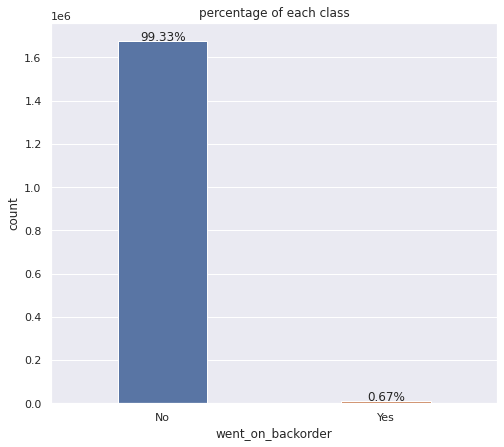

In [ ]:
#ref:https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
#ref:https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

plt.figure(figsize=(8,7))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x='went_on_backorder',data=data)
ax.set_title('percentage of each class')
xticks=ax.get_xticks()
for i,p in enumerate(ax.patches):
  width=0.4
  p.set_width(width)           #set width of patches
  p.set_x(xticks[i]-width/2)   #recenter patches
  x=p.get_x()+width/2          #position of text
  y=p.get_height()+0.4
  ax.text(x,y,"{:0.2f}%".format(bo_percent[i]),ha="center")
  


### Observations:
1.The target variable take 2 values: 'Yes' & 'No'(1 & 0) and interprets whether the product went on backorder or not.
2. More than 99% of the observations belong to class 'No'.ie., majority of products do not go on backorder.
3. Very small percentage of products tend to go on back order(minority class).

### Conclusion:
* Clearly, the dataset is highly imbalanced with percentage of minority is less than 1.


## 4.Correlations of features

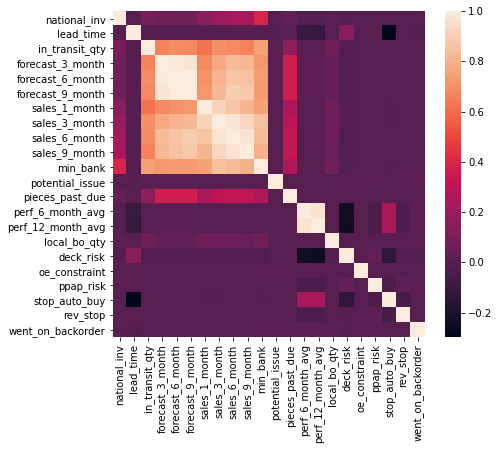

In [ ]:
# converting 'Yes'/'No' with 1/0.
for feat in data.columns:
  if data[feat].dtype=='O':
    data[feat]=data[feat].replace({'Yes': 1,'No': 0})
# heatmap of correlations
corr=data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr)


### Observations:
* Many Features are correlated with each other.
* in_transit_qty,forecast_x_month,sales_x_month and minbank are highly correlated to each other.
* All the three forecast features are highly correlated to each other.
* Similarly, sales features are highly correlated to each other.
* pieces past due is correlated with in transit quantity,sales and forecast_features
*Also,inventory has good correlation with sales and min_bank features.
* No feature shows high correlation with target.
*stop_auto_buy and lead time shows negative correlation.
* Similarly deck_risk shows negative correlation with perf_X_month_avg features.
* All other correlations are positive


## 5.Continuous Features : High level statistics

In [ ]:
# descriptive statisics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


### Observations :

1. Looking at the high level statistics, min ,median,max values of most featurse lie in a wide range,indicating high variability of features.

2. 'national_inv' :
* For national_inv, min is a large negative value, indicates there are few negative values of inventory.
* Even the 75th percentile value is very small compared to the mean and max values. This means that 75% of values are very small and there are few no of observaions for high values those lie in a wide range.ie., the distibution is positively skewed with a very long tail.
3. 'lead_time':
* Similarly, most of the values for 'lead_time' feature are small compared to maximum value. 
* Still the mean value  lies in the interquartile range,which is very small.   * Also variance is not too large. So the extreme values may not be in large numbers or high variability. Probably this might be because of outliers.
4. The features 'in_transit_qty',forecast features,sales features,'min_bank','pieces_past_due' and 'local_bo_qty'  shows a similar behaviour. 
* For these features, either 50% or 75% are zero and they also show very large values at the right extreme.
*  Mean, variance and max values show that these features are also right skewed with very long tail.ie.,high values with very small density.
5. 'perf_6_month_avg','perf_12_month_avg': Max value of these features are 1.
25th,50th & 75th percetiles are greater than zero,while mimimum value is -99.
* Since all other values lie between 0-1,the -99 value could be some missing value imputed.

### Conclusions:

* Most of the features are highly skewed to the right. There are large no. of small values and very few no. of large values for these variables.
* These large values need not necessarily be outliers as this is sales and inventory data and there can be wide range of sales prices, quantities depending on size of business,product variety available etc. But extreme high values might be anomalous.
* There are large negative values in inventory. This may be because errors like:
   * Order placed,did't complete it due to insufficient stock (backorders) but recorded as sales by mistake.
   * Errors due to duplication of sales data.
   * Missing of any purchase data.
* There are missing values in perf_6_month_avg & perf_12_month_avg and lead_time.
* For forecast and sales features, many values are zero, means there was no sales in previous months and no estimated future sales for a large no of products. May be these are less-demanded products and are less likely to go on backorder,contributing to a large portion of majority class.


## 5.1. Plotting the distribution of Continous features : High level view

In [ ]:
data.columns


Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

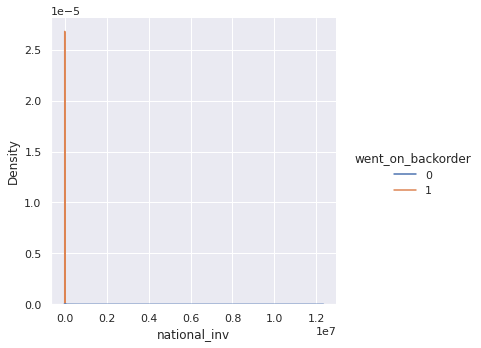

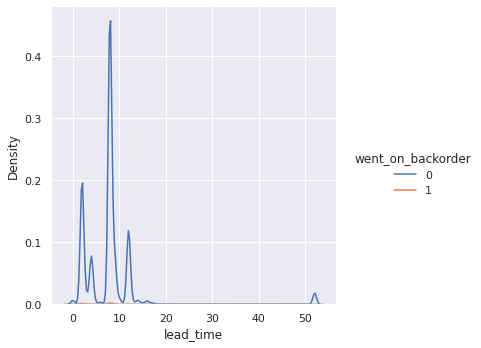

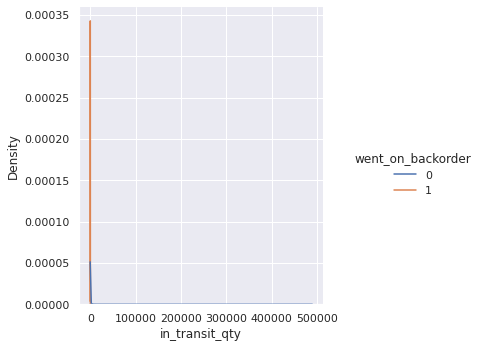

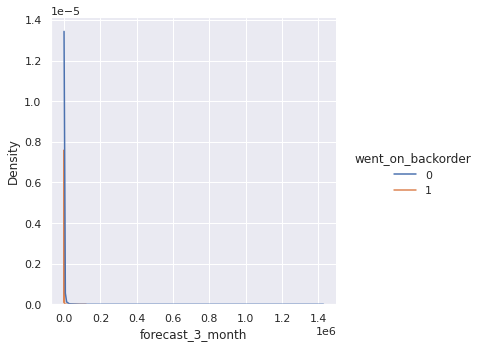

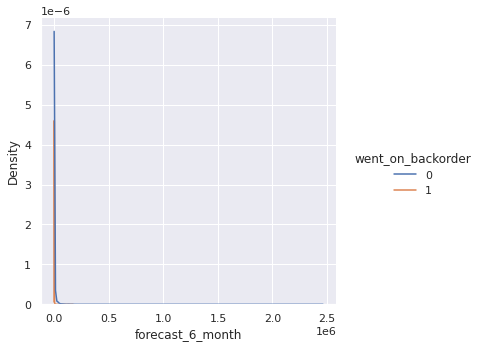

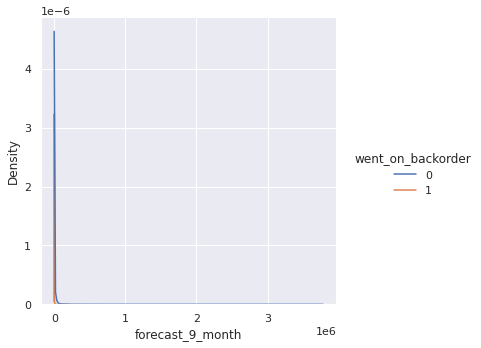

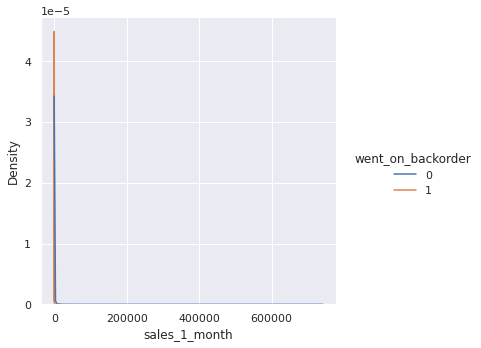

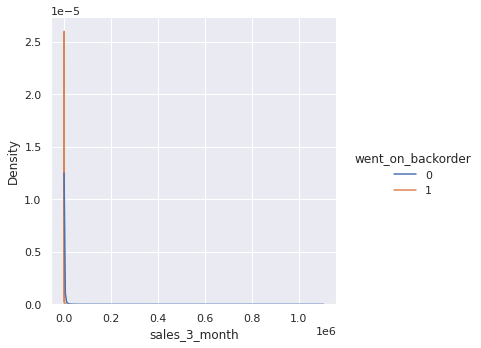

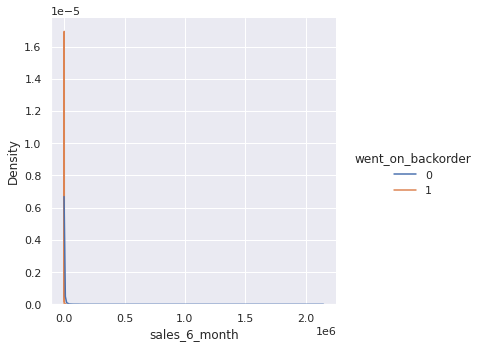

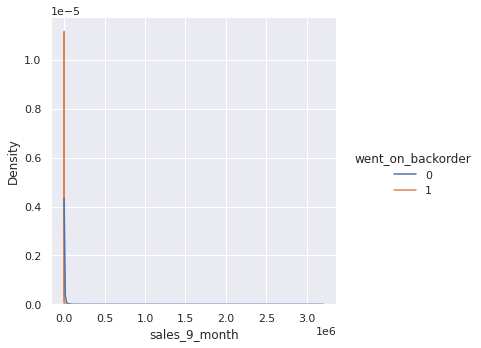

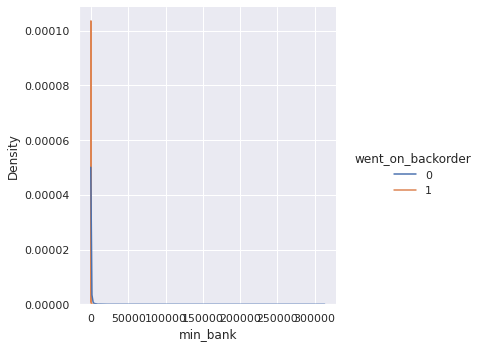

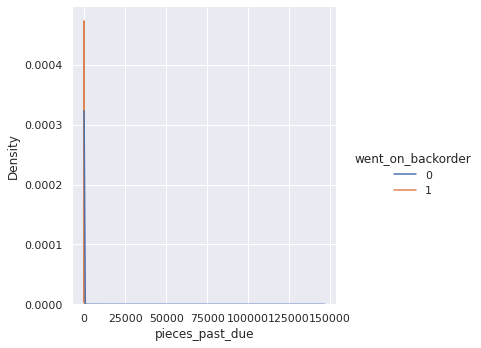

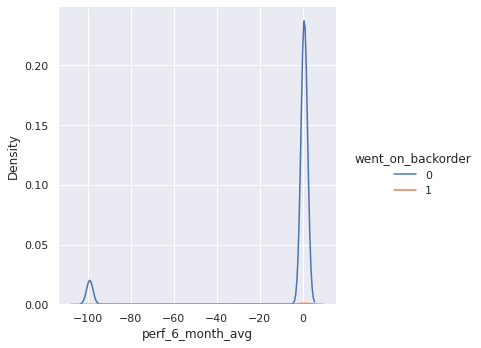

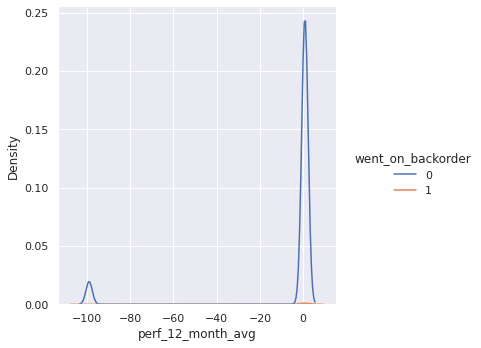

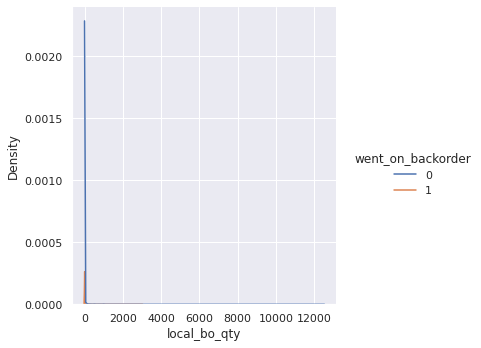

In [ ]:
#distribution of continuous features 

for feat in data.columns:
  if data[feat].dtype=='float64':
    sns.displot(data,x=feat,kind='kde',hue='went_on_backorder')
    plt.show()

### Observations:
* As inferred earlier, all of these features are highly right-skewed.
* national_inv : 
   * Most of products that went on backorder are those having current inventory as very low value. Products that are adequate in stock are less likely to go on back order.
* lead_time: 
   * Lead time of products lies between 0-52 days.
   * Most of the products are having leadtime 6-8 days.
   * Products belonging to both classes show lead-time in all ranges.
* in_transit_quantity:
  * Similar to current stock(national_inv), products that have in_transit_quantity minimum or zero tend to go on backorder than those having higher values of in_transit_quantity.
* Forecast:
   * Forecasts for next 3,6 and 9 months are showing similar behaviour.
   * Majority of products are having low values of sales forecasts despite the class they belong to.The two classes overlaps at a high level view.
   * To get more insights we will have a closer look into the plot in the later sections.
* Sales:
   * Sales of previous 1,3,6 and 9 months are showing similar behaviour. 
   * Most of the products  are having low sales, comapred to the extreme value.
   * Majority of  Products that went on backorder are having lower sales value while many products that didn't go on backorder are having high sales.
   * lower sales for products that went on backorder is alarming because the
   reason for low sales could be insufficient stock, need not be lack of demand. This shows the need for better handling of inventory and backorder detection.   
   * We will get more insights from a closer look of these plots.
* min_bank:
  * Conversely, the minimum recommended stock for products that went on backorder is also lower for most of the instances. Still they go on backorder and sales is lower. Need to dig into these features further.
* pieces_past_due:
  * As seen in other features, the overdue of parts/products are lower for majority  of the instances
* perf_6_month_qty,perf_12_month_qty:
  * performance of products of last 6 and 12 months behaves similar.Behaves like Normal disribution around zero.
  * There is few values at -99 seems like these are not actual values. could be some missing value imputed.
* Local_bo_qty:
  * Many products that didn't go on backorder are having low values of overdue also. 

* There are many products  that are having a healthy sales,inventory and flow management. We should focus more on that minority of products which goes on backorder, lower on sales and shows high values of overdue and come up with if there is any trend in these features.

 

## 5.2. Continuous Features: analysis

* To get further insights, violin plot of the feature, violin plot and boxplot  of range of percentiles for each feature is plotted below:

In [ ]:
#ref:https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
def plot_feature(feat,q1,q2):

  #'''This function plots  violin plot of the feature, violin plot and boxplot of given range of percentiles of given feature '''

    fig,axes=plt.subplots(1,3, figsize=(20, 5))
    fig.suptitle(feat)
    
    
    sns.violinplot(data=data,x='went_on_backorder',y=feat,hue='went_on_backorder',ax=axes[0])
    axes[0].set_title("Violin plot")
    sns.set_style('darkgrid')
    
    q1_=np.percentile(data[feat],q1)
    q2_=np.percentile(data[feat],q2)
    filtered=data[(data[feat]>=q1_) & (data[feat]<=q2_)]
    sns.violinplot(data=filtered,x='went_on_backorder',y=feat,hue='went_on_backorder',ax=axes[1])
    axes[1].set_title("Violin plot of {}th percentile and {}th percentile values".format(q1,q2))
    
    
    sns.boxplot(data=filtered,x='went_on_backorder',y=feat,hue='went_on_backorder',ax=axes[2])
    axes[2].set_title("Box plot of {}th percentile and {}th percentile values".format(q1,q2))
    
    plt.legend(loc='upper right')
    plt.show()

def plot_percentiles(feat,q1,q2):

  #'''This function plots  boxplot of given range of percentiles of given feature '''

    q1_=np.percentile(data[feat],q1)
    q2_=np.percentile(data[feat],q2)
    filtered=data[(data[feat]>=q1_) & (data[feat]<=q2_)]
    
    plt.figure(figsize=(7,6))
    ax=sns.boxplot(data=filtered,x='went_on_backorder',y=feat,hue='went_on_backorder')
    ax.set_title("Box plot of {}th percentile and {}th percentile values".format(q1,q2))
    
    plt.legend(loc='best')
    plt.show()

## 5.2.1.national_inv

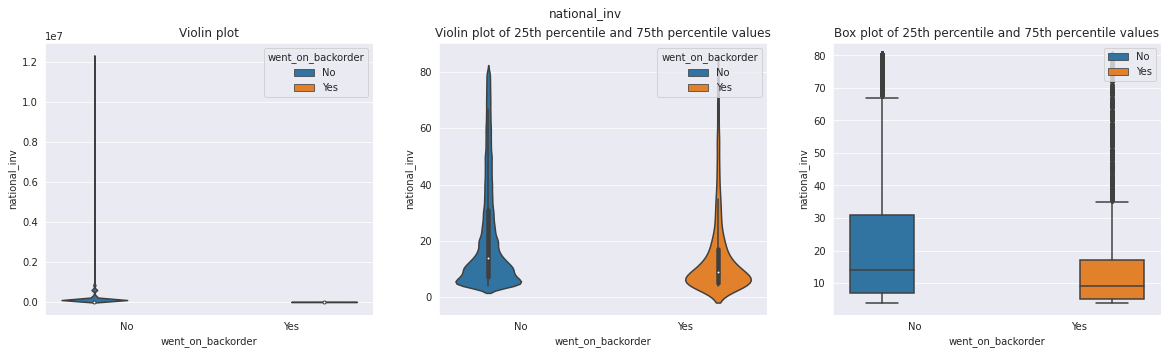

In [ ]:
#national_inv #plotting IQR
plot_feature('national_inv',25,75)

### Obserrvations:
* Looking into the IQR, most of the products that went on backorder have low values of current inventory. It is not surprising that products which are insufficient in stock, and in demand would go on backorder.
*  Median of stock of products that went on backorder are less than those which didn't go backorder.
* 75% of products  have current stock less than 80 units.
* A minority of products having high value of current stock(beyond 75th percentile), still went on backorder.
* There are negative values in current inventory.
* Now, Looking into negative values of national_inv:

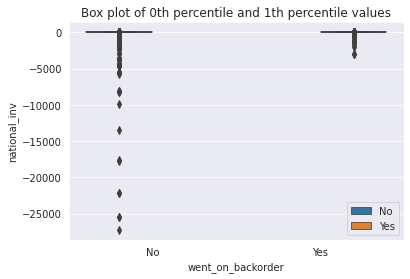

In [ ]:
#Analysing negative inventory.
plot_percentiles('national_inv',0,1)

### Observations:
* Products having very large negative values didn't go on backorder. Such huge amounts of negative value seems like outliers or errors.
* There are products having small negative inventory values belonging to both classes.

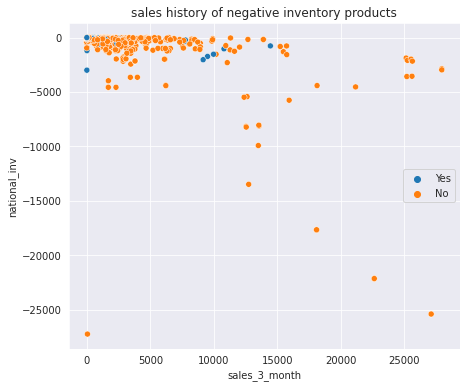

In [ ]:
# Checking the sales history of negative inventory products
filter=data[(data['national_inv']<0)][['sales_3_month','national_inv','went_on_backorder']]
plt.figure(figsize=(7,6))
sns.scatterplot(data=filter,x='sales_3_month',y='national_inv',hue='went_on_backorder').set_title('sales history of negative inventory products')
plt.legend(loc='best')

### Observations:
* The plot shows the sales of products having negative inventory.
* Products that are having very large negative value(beyond -5000) of inventory, are showing  very large value of sales in the past 3 months, and this is greater than double the 99.5th percentile of sales, which is abnormal.
* Extremely large values of sales and consequent large negative values without going on backorder may be the result of duplication of sales records.
* Clearly these are outliers.
* There are also products with large sales and small negative inventory(below 5000). Those may be considered as actual data because it is not that much erroneous to have high values of sales and small negative inventory .
* Most of the points having negative inventory shows inventory values below -1000 and sales less than 10000.
* Sales and inventory values for products which went on backorder are typically lower than those for products that didn't.


In [ ]:
#extreme value of inventory
print('The 99.5th percentile of sales:',np.percentile(data['sales_3_month'],99.5))

The 99.5th percentile of sales: 4275.7050000000745


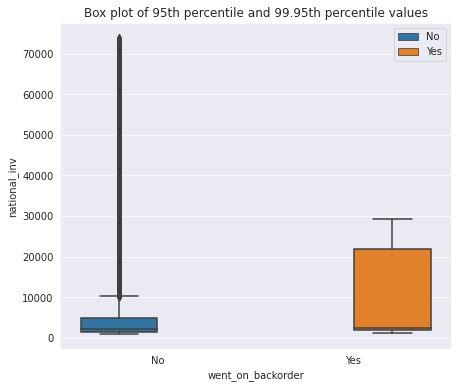

In [ ]:
# looking into the higher extremes of national_inv #ploting 95-99.5th percentiles.
plot_percentiles('national_inv',95,99.95)

### Observations:
* Surprisingly, There are few products those went on backorder even if inventory is very high.
* All products that shows extreme high values of inventory, didn't go on backorder.
* Products those have high inventory value and still went on backorder are analysed below.

In [ ]:
#checking if there is any relation between sales,minimum stock and current inventory for products that didn't go on backorder at high values of national_inv.
np.percentile(data['national_inv'],95),np.percentile(data['national_inv'],99.9)

(922.0, 41368.28200000059)

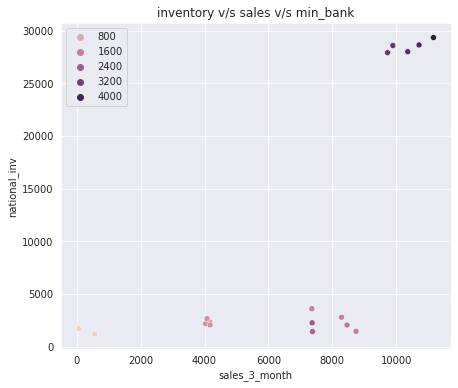

In [ ]:
#plot highest of inventory-sales-min_bank
filter=data[(data['national_inv']>1000)&(data['went_on_backorder']=='Yes')]
plt.figure(figsize=(7,6))
sns.scatterplot(data=filter,x='sales_3_month',y='national_inv',hue='min_bank').set_title('inventory v/s sales v/s min_bank')
plt.legend(loc='best')

### Observations:
* For items those went on backorder that shows high inventory also shows high sales, and high value of recommended stock. So this can't be an outlier but result of some increased demand or anything.
* Eventhough these are information at extreme points, this can't be an outlier since this is skewed and there is high variance at larger values  and showing sensible relationships.

### Conclusions: national_inv.:
1. 75% of products have lower current stock (leess than 80 units)
2. There are large and small values of negative inventory. Large negative invertory is associated with large sales values.
3.There are erroneous points in the negative region.
4.Products having highest of inventory values didn't go on backorders.
5. Products having high values of inventory and did go on backorder also had high sales history and high values of minimum recommended stock.




---





## 5.2.2.lead_time

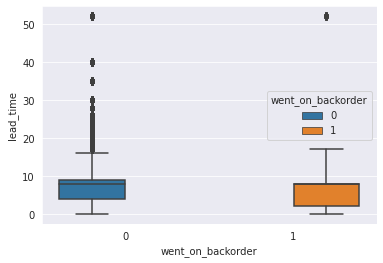

In [ ]:
#lead time has few nan values.
data_=data[data['lead_time'].notnull()]
sns.boxplot(data=data_,x='went_on_backorder',y='lead_time',hue='went_on_backorder')

### Observations:
* Median of the lead time feature is higher for procducts that didn't go on backorder.
* Most of the instances have lead time less than 10 days.
* There are few products with very high lead time, and such products are mostly of the type that didn't go on backorder.

### Conclusions:lead_time:
1.Most of the obeservations have lower lead time.
2.lead time of products that didn't go on backorder have slightly higher leadtime.






---




## 5.2.3. In_transit_qty

* Looking into the percentile values of in_transit_qty.

In [ ]:
#percentiles
print("75th percentile :",np.percentile(data['in_transit_qty'],75))
print("80th percentile :",np.percentile(data['in_transit_qty'],80))
print("90th percentile :",np.percentile(data['in_transit_qty'],90))
print("95th percentile :",np.percentile(data['in_transit_qty'],95))
print("98th percentile :",np.percentile(data['in_transit_qty'],98))
print("99th percentile :",np.percentile(data['in_transit_qty'],99))
print("99.90th percentile :",np.percentile(data['in_transit_qty'],99.9))
print("99.95th percentile :",np.percentile(data['in_transit_qty'],99.95))
print("99.99th percentile :",np.percentile(data['in_transit_qty'],99.99))

75th percentile : 0.0
80th percentile : 1.0
90th percentile : 16.0
95th percentile : 68.0
98th percentile : 252.0
99th percentile : 570.0
99.90th percentile : 5547.423000000883
99.95th percentile : 10170.564000001177
99.99th percentile : 33685.266399974


### Observations:
* in_transit_qty is extremely skewed
* 75% of samples have zero stock in transit.
* After 99th percentile, feature is showing high variance.
* Plotting distribution of higher values:

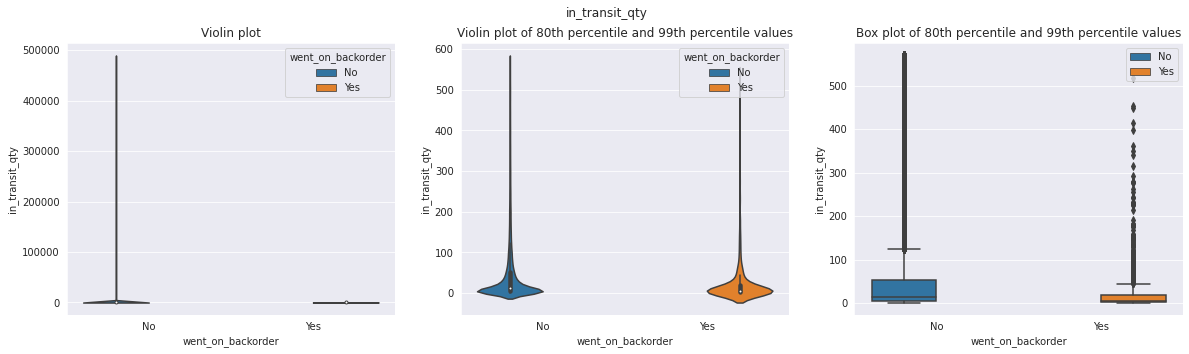

In [ ]:
#dstribution byond IQR
plot_feature('in_transit_qty',80,99)

### Observations:
* 99% of samples have in_transit quantity less than 600, and both classes are overlapping at lower values.
* Still in_transit_qty of products those went on backorder is less than those didn't.
 
### Conclusions: in_transit_qty:
1. Most of the products have zero units in transit.
2. 'in_transit_qty' is lower for products that went on backorder.




---

## 5.2.4.Forecast features

* There are 3 forecast features, 'forecast_3_month','forecast_6_month' and 'forecast_9_month'. These features are showing high correlatons. Plotting the relation among these features:

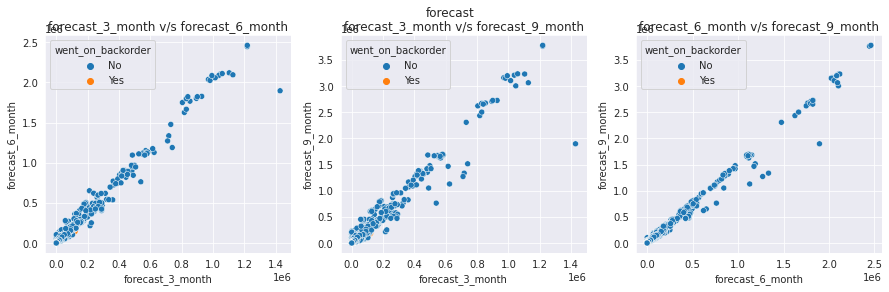

In [ ]:
# scatterplot between forecast features
fig,axes=plt.subplots(1,3, figsize=(15,4))
fig.suptitle('forecast')
    
sns.scatterplot(data=data,x='forecast_3_month',y='forecast_6_month',hue='went_on_backorder',ax=axes[0])
axes[0].set_title('forecast_3_month v/s forecast_6_month')
sns.set_style('darkgrid')

sns.scatterplot(data=data,x='forecast_3_month',y='forecast_9_month',hue='went_on_backorder',ax=axes[1])
axes[1].set_title('forecast_3_month v/s forecast_9_month')
    
sns.scatterplot(data=data,x='forecast_6_month',y='forecast_9_month',hue='went_on_backorder',ax=axes[2])
axes[2].set_title('forecast_6_month v/s forecast_9_month')
    
    
plt.show()

### Observations:
* forecast_3_month,forecast_6_month,forecast_9_month : all of these forcast features behaves similarly.
* These features shows linear relationships among themselves.
* Analysing forecast_3_month:

In [ ]:
#percentiles
print("25th percentile :",np.percentile(data['forecast_3_month'],25))
print("50th percentile :",np.percentile(data['forecast_3_month'],50))
print("65th percentile :",np.percentile(data['forecast_3_month'],65))
print("75th percentile :",np.percentile(data['forecast_3_month'],75))
print("80th percentile :",np.percentile(data['forecast_3_month'],80))
print("90th percentile :",np.percentile(data['forecast_3_month'],90))
print("95th percentile :",np.percentile(data['forecast_3_month'],95))
print("98th percentile :",np.percentile(data['forecast_3_month'],98))
print("99th percentile :",np.percentile(data['forecast_3_month'],99))
print("99.95th percentile :",np.percentile(data['forecast_3_month'],99.95))
print("99.99th percentile :",np.percentile(data['forecast_3_month'],99.99))

25th percentile : 0.0
50th percentile : 0.0
65th percentile : 0.0
75th percentile : 4.0
80th percentile : 12.0
90th percentile : 83.0
95th percentile : 300.0
98th percentile : 1040.0
99th percentile : 2286.0
99.95th percentile : 40662.62700001383
99.99th percentile : 137108.30399964005


### Observations:
* As seen earlier, more than 65% of the observations have zero forecast.
* After 90th percentile, distribution shows higher variability

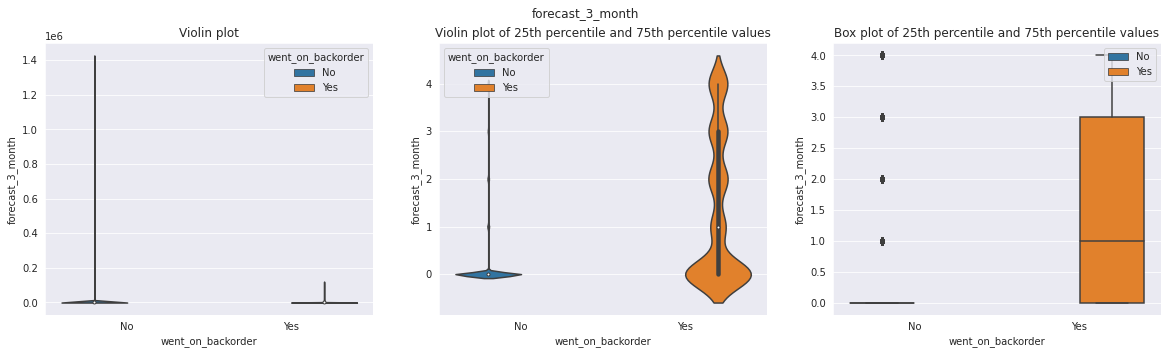

In [ ]:
#IQR of forecast features
plot_feature('forecast_3_month',25,75)

### Observations:
* Within 25th and 75th percentile, both classes are clearly seperated and most of the products belong to minority class. 
* Products that are having forecasts within IQR tend to go on back order.
* Products that didn't go on backorder seems to have high forcasts.
* Analysing higher values:

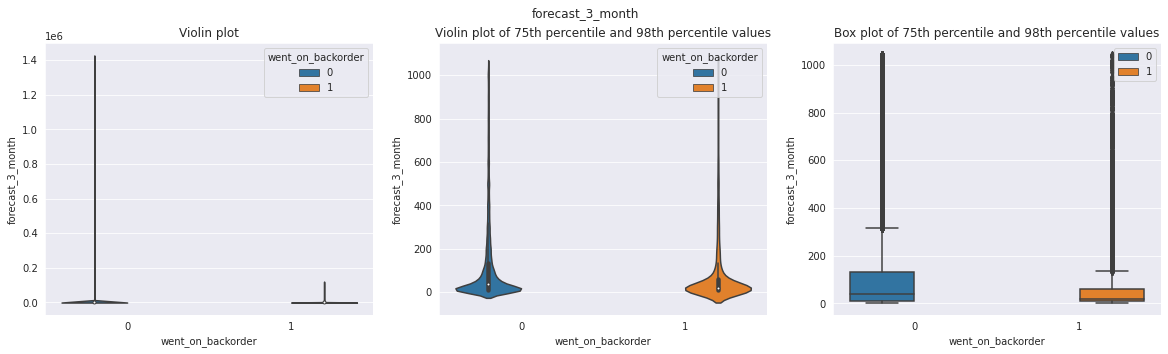

In [ ]:
#distribution beyond IQR
plot_feature('forecast_3_month',75,98)

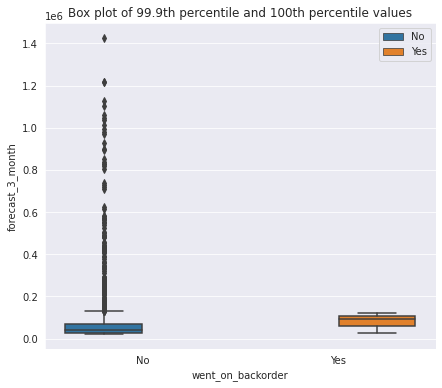

In [ ]:
#distribuion at very high values
plot_percentiles('forecast_3_month',99.90,100)

### Observations:

* Beyond IQR, forecast of products that went on backorder are lower than products that didn't.
* But at extremely high values, forecast of few products those went on backorder are slightly higher than that of products those didn't go on backorder.
* Products with highest of values of forecast didn't go on backorder.

### Conclusions: Forecast features:
1. All three forecast features shows linear relationships among each other.
2. Products having lower forecast tend to go on backorder.
3. Majority of products that went on backorder are having higher forecast(beyond 75th percentile)
4.At IQR both classes are distinguishable.








---




## 5.2.5.Sales Features

* Like Forecast features there are 3 sales features, sales_1_month,sales_6_month and sales_9_month and are highly correlated. Plotting the relation between sales features:

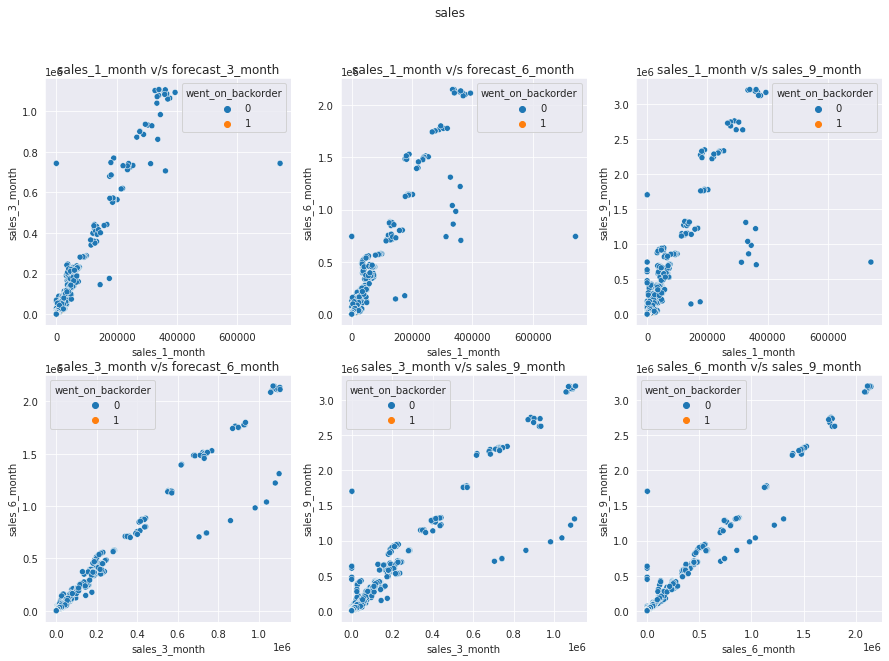

In [ ]:
fig,axes=plt.subplots(2,3, figsize=(15,10))
fig.suptitle('sales')
    
sns.scatterplot(data=data,x='sales_1_month',y='sales_3_month',hue='went_on_backorder',ax=axes[0][0])
axes[0][0].set_title('sales_1_month v/s forecast_3_month')

sns.scatterplot(data=data,x='sales_1_month',y='sales_6_month',hue='went_on_backorder',ax=axes[0][1])
axes[0][1].set_title('sales_1_month v/s forecast_6_month')
    
sns.scatterplot(data=data,x='sales_1_month',y='sales_9_month',hue='went_on_backorder',ax=axes[0][2])
axes[0][2].set_title('sales_1_month v/s sales_9_month')

sns.scatterplot(data=data,x='sales_3_month',y='sales_6_month',hue='went_on_backorder',ax=axes[1][0])
axes[1][0].set_title('sales_3_month v/s forecast_6_month')
    
sns.scatterplot(data=data,x='sales_3_month',y='sales_9_month',hue='went_on_backorder',ax=axes[1][1])
axes[1][1].set_title('sales_3_month v/s sales_9_month')

sns.scatterplot(data=data,x='sales_6_month',y='sales_9_month',hue='went_on_backorder',ax=axes[1][2])
axes[1][2].set_title('sales_6_month v/s sales_9_month')
    
    
    
plt.show()

### Observations:
* Sales_3_month,sales_6_month,sales_9_month are behaving similarly.
* They show linear relationship among themselves
* Analysing sales_3_month:

In [ ]:
#percentiles
print("50th percentile :",np.percentile(data['sales_1_month'],50))
print("60th percentile :",np.percentile(data['sales_1_month'],60))
print("75th percentile :",np.percentile(data['sales_1_month'],75))
print("80th percentile :",np.percentile(data['sales_1_month'],80))
print("90th percentile :",np.percentile(data['sales_1_month'],90))
print("95th percentile :",np.percentile(data['sales_1_month'],95))
print("98th percentile :",np.percentile(data['sales_1_month'],98))
print("99th percentile :",np.percentile(data['sales_1_month'],99))
print("99.95th percentile :",np.percentile(data['sales_1_month'],99.95))
print("99.99th percentile :",np.percentile(data['sales_1_month'],99.99))

50th percentile : 0.0
60th percentile : 1.0
75th percentile : 4.0
80th percentile : 8.0
90th percentile : 34.0
95th percentile : 107.0
98th percentile : 340.0
99th percentile : 699.0
99.95th percentile : 10996.282000000589
99.99th percentile : 39623.138399994


### Observations:
* More than 50% of observations have zero sales in the past 3 months.
* Beyond 90th percentile, feature shows high variability.
* plotting distribution in IQR:

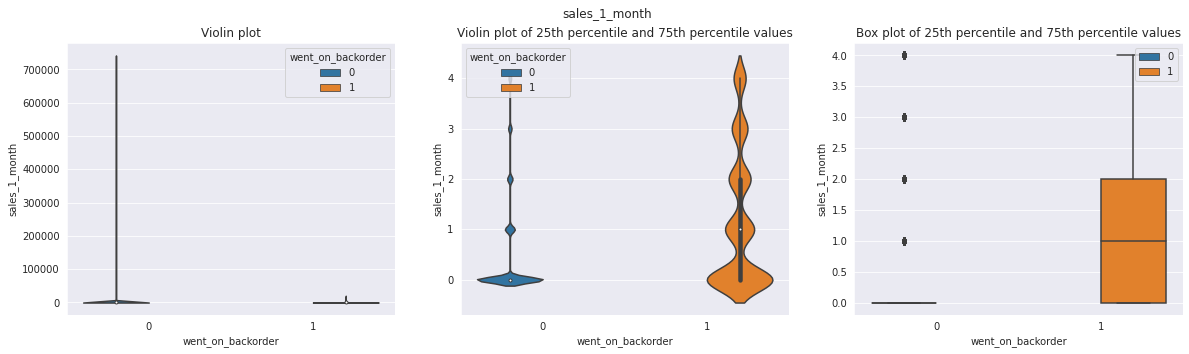

In [ ]:
#IQR
plot_feature('sales_1_month',25,75)

### Observations:
* A similar trend as in forecast features is seen here.
* Most of the observations that  go on backorder lies in the IQR.
* Most of the Products that didn't go on backorder lies beyond IQR.
* This is because IQR values are very low
* what is happening at lower sales value?

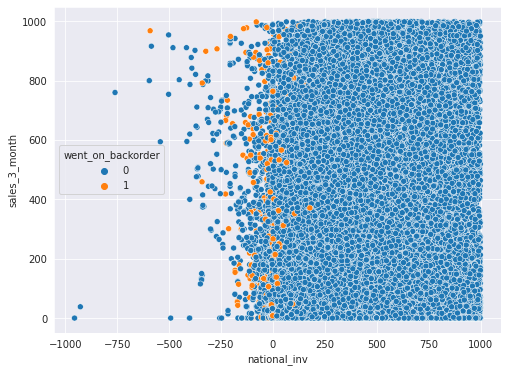

In [ ]:
# plotting inventory level and for low sales values 
filter=data[(data['sales_3_month']<1000)&(data['national_inv']<1000)&(data['national_inv']>-1000)]
plt.figure(figsize=(8,6))
sns.scatterplot(data=filter,y='sales_3_month',x='national_inv',hue='went_on_backorder')

### Observations:
* At lower values of sales, products that went on backorder is having less inventory than products that didn't.
* This could be the reason behind product with lower sales did go on backorder.
* Looking into high sales values:

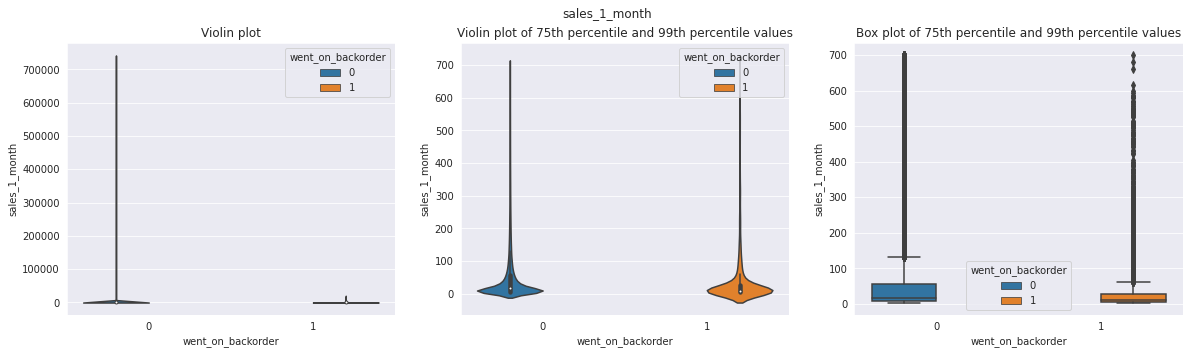

In [ ]:
plot_feature('sales_1_month',75,99)

### Observations:
* Very high values of sales are observed for products that belong to both classes.
* Products having highest sales records didn't go on backorder(many of these are identified with large negative inventory and suspected to be outliers).
* Similar trend is observed in sales_6_month & sales_9_month.

### Conclusions: Sales Features:
1. All three sales features show linear relations each other.
2. All the products that have lower sales value and low inventory, go on backorder.



---




## 5.2.5.min_bank

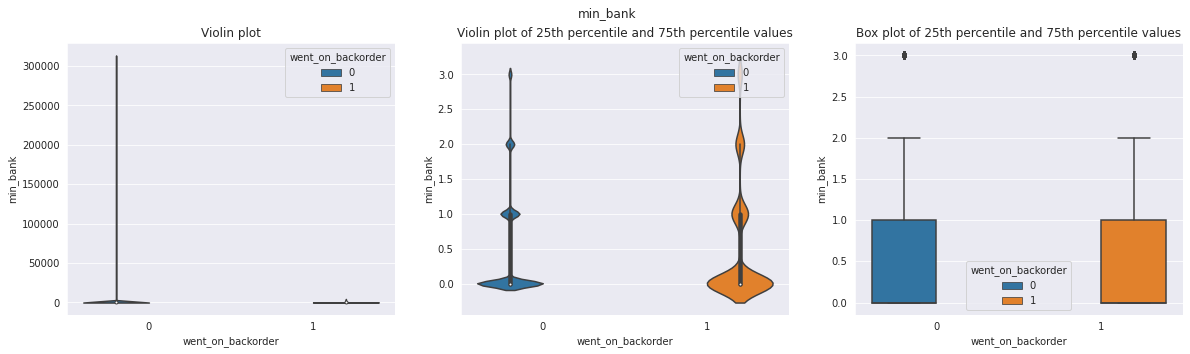

In [ ]:
#IQR
plot_feature('min_bank',25,75)

In [ ]:
print("25th percentile :",np.percentile(data['min_bank'],25))
print("60th percentile :",np.percentile(data['min_bank'],60))
print("75th percentile :",np.percentile(data['min_bank'],75))
print("80th percentile :",np.percentile(data['min_bank'],80))
print("90th percentile :",np.percentile(data['min_bank'],90))
print("95th percentile :",np.percentile(data['min_bank'],95))
print("98th percentile :",np.percentile(data['min_bank'],98))
print("99th percentile :",np.percentile(data['min_bank'],99))
print("99.95th percentile :",np.percentile(data['min_bank'],99.95))
print("99.99th percentile :",np.percentile(data['min_bank'],99.99))

25th percentile : 0.0
60th percentile : 1.0
75th percentile : 3.0
80th percentile : 10.0
90th percentile : 46.0
95th percentile : 125.0
98th percentile : 340.0
99th percentile : 679.0
99.95th percentile : 10686.269000002649
99.99th percentile : 36394.78879990801


### Observations:
* A similar trend as above features are seen in min_bank.
* 60% of instances have min_bank less than 1.
* Both classes have similar distribution in IQR.
* Closer look to the tail portion:

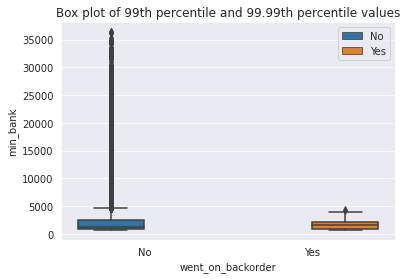

In [ ]:
plot_percentiles('min_bank',99,99.99)

### Observations:
* The minimum stock recommended are very high for very few instances.May be these products are those with higher sales and higher demand.
* Products for which the  minimum stock recommended are highest didn't go on back order(above 25000)

### Conclusions: min_bank
* The minimum stock recommended have similar distibution across both target classes.



---






## 5.2.6.pieces_past_due

In [ ]:
#percentiles
print("75th percentile :",np.percentile(data['pieces_past_due'],75))
print("80th percentile :",np.percentile(data['pieces_past_due'],80))
print("90th percentile :",np.percentile(data['pieces_past_due'],90))
print("95th percentile :",np.percentile(data['pieces_past_due'],95))
print("98th percentile :",np.percentile(data['pieces_past_due'],98))
print("99th percentile :",np.percentile(data['pieces_past_due'],99))
print("99.95th percentile :",np.percentile(data['pieces_past_due'],99.95))
print("99.99th percentile :",np.percentile(data['pieces_past_due'],99.99))

75th percentile : 0.0
80th percentile : 0.0
90th percentile : 0.0
95th percentile : 0.0
98th percentile : 0.0
99th percentile : 4.0
99.95th percentile : 504.0
99.99th percentile : 2268.64229999925


### Observations:
* 98% of instances  have zero parts overdue from source.
* The top 1% shows high variance

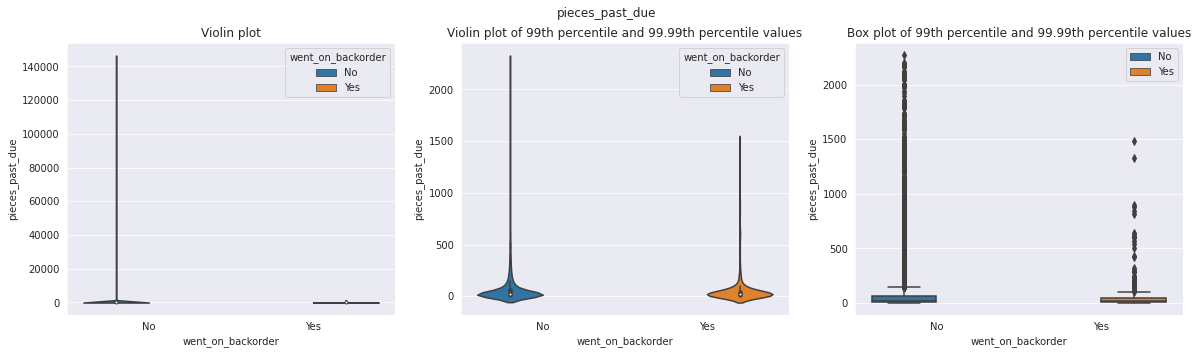

In [ ]:
plot_feature('pieces_past_due',99,99.99)

### Observations:
* Both classes shows high values of parts overdue for very few instances.
* Instances those didn't go on  backorders show highest parts overdue.

## 5.2.7.perf_6_month_avg,perf_12_month_avg

* perf_6_month_avgb and perf_12_month_avg are highly correlated and have similar distribution.
* percentiles of perf_6_month_avg

In [ ]:
#percentiles
print("0th percentile :",np.percentile(data['perf_6_month_avg'],0))
print("25th percentile :",np.percentile(data['perf_6_month_avg'],25))
print("50th percentile :",np.percentile(data['perf_6_month_avg'],50))
print("75th percentile :",np.percentile(data['perf_6_month_avg'],75))
print("100th percentile :",np.percentile(data['perf_6_month_avg'],100))


0th percentile : -99.0
25th percentile : 0.63
50th percentile : 0.82
75th percentile : 0.97
100th percentile : 1.0


### Observations:
* The lowest value observed is -99 and all other values are between 0 and 1.
* Most probably -99 values would be some missing value imputed.
* Imputing -99 with -1 for onvenience:

In [ ]:
data['perf_6_month_avg'] = data['perf_6_month_avg'].replace([-99],-1)
data['perf_12_month_avg'] = data['perf_12_month_avg'].replace([-99],-1)

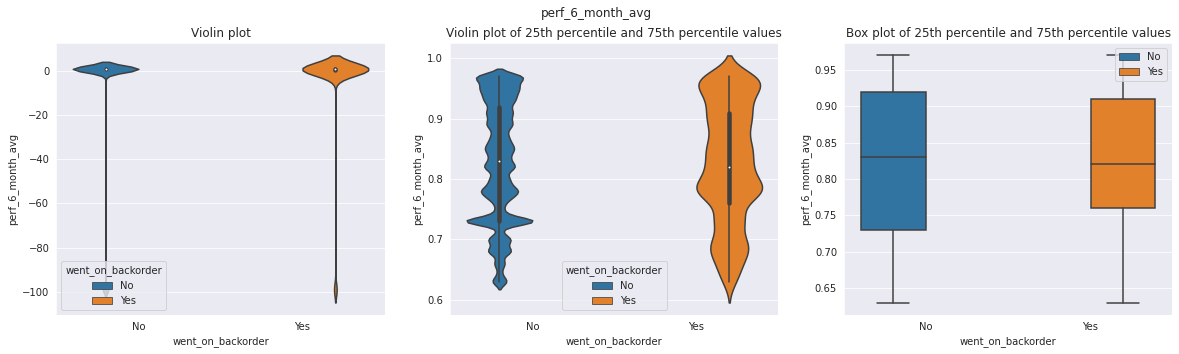

In [ ]:
plot_feature('perf_6_month_avg',25,75)

### Observations:
* Both classes shows variance over the entire  of IQR.
* Majority of the products those didn't go on backorder shows higher values of perf_6_month, and values are typically higher than that of products those went on backorder.
* Medians of both classes lie closer.

### Conclusions:
* Both target classes have similar values of perfomance feature.


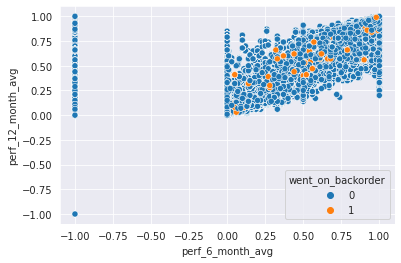

In [ ]:
#plot between perf_6_month_avg and perf_12_month_avg
sns.scatterplot(data=data,x='perf_6_month_avg',y='perf_12_month_avg',hue='went_on_backorder')

Observations:
* More values are missing in perf_6_month_avg than perf_12_month_avg.
* For every observatoins where perf_12_month_avg is missing, perf_6_month_avg is also missing.
* Similarly many values of perf_6_month_avg are 0 and 1 but perf_12_month_avg have varying values for these observations.
* For values other than missing values,both show linear relationship.


#### Missing values

In [ ]:
#missing values#observations for which leadtime is nan
filter=data[data['lead_time'].isna()]
print(filter['perf_6_month_avg'].value_counts())
print(filter['perf_12_month_avg'].value_counts())
print(filter['went_on_backorder'].value_counts())

-1.0    100893
Name: perf_6_month_avg, dtype: int64
-1.0    100893
Name: perf_12_month_avg, dtype: int64
0    100569
1       324
Name: went_on_backorder, dtype: int64


### Observations:
* For all the observations where leadtime is NaN, perf_6_month & perf_12_month values are -1.ie, missing values are not random.
### Conclusions:
* Missing value exists for a particular set of observations. Wherever lead-tme is unknown, perfomance features are also unavailable.
* There is no relation between missing values and target variable.




---





## 5.2.8.local_bo_qty

In [ ]:
#percentiles
print("75th percentile :",np.percentile(data['local_bo_qty'],75))
print("90th percentile :",np.percentile(data['local_bo_qty'],90))
print("99th percentile :",np.percentile(data['local_bo_qty'],99))
print("99.95th percentile :",np.percentile(data['local_bo_qty'],99.95))
print("99.99th percentile :",np.percentile(data['local_bo_qty'],99.99))

75th percentile : 0.0
90th percentile : 0.0
99th percentile : 1.0
99.95th percentile : 216.07050000014715
99.99th percentile : 1001.21409999975


* 99% of instances have local_bo_qty less than or equal to 1.
* Top 1% shows high variance.

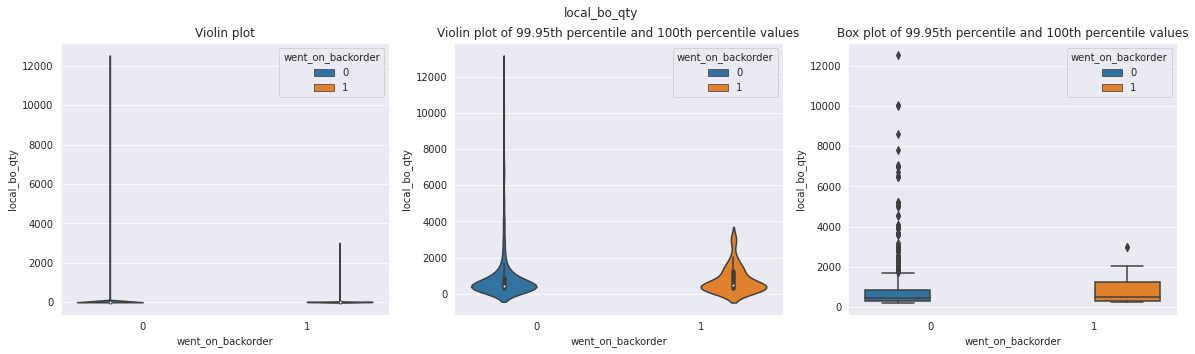

In [ ]:
plot_feature('local_bo_qty',99.95,100)

### Observations:
* As observed in other features very high values are observed for products those didn't go on backorder.
* Products those went on backorder shows slightly higher values (in range<2000).
* Products having extremely high values of loal_bo_qty didn't go on backorder.


## 6.Discrete features

In [ ]:
discrete=['potential_issue','deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop']

'doc string'

In [ ]:
#ref:https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def plot_discrete(feat):
    """This function plots countplot of given feature with percentage of each target class in each category  annotated.eg: x% of flag=0 belongs to class'went_on_backorder"""
    plt.figure(figsize=(7,6))
    ax=sns.countplot(data=data,x=feat,hue='went_on_backorder')

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.2%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.2%}'.format(height_r/total), ha="center")
    plt.show()


## 6.1.potential_issue

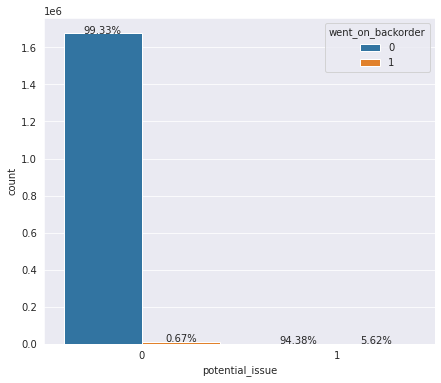

In [ ]:
plot_discrete('potential_issue')

## Observations:
* potential-issue is zero for most of the observations.
* Distribution of classes is similar for both values of potential issue.
* 99% of observations with potential_issue=0 didn't go on backorder whereas 94% of observations with a potential issue didn't go on backorder.
* percentage of products that went on backorder where there is a potential issue is slightly higher than percentage of products that went on backorder when there is no potential_issue.But this is because the imbalance in both classes. 


## 6.2.deck_risk.

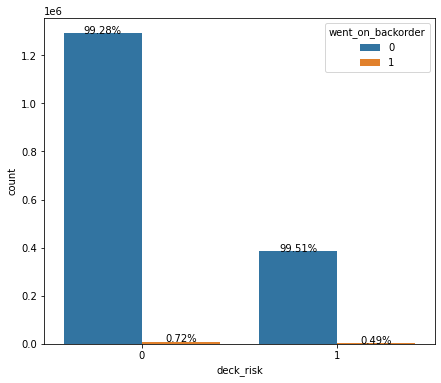

In [ ]:
plot_discrete('deck_risk')

## Observations
* No. of observations not having deck_risk is much higher than no. of observations having deck_risk.
* Both of the target classes have same distribution for both values of deck_risk.ie., more than 99% of observations having no deck risk belong to class 'went_on_backorder'. Also 99% of observations having deck risk belong to class that didn't went on backorder.


## 6.3.oe_constraint

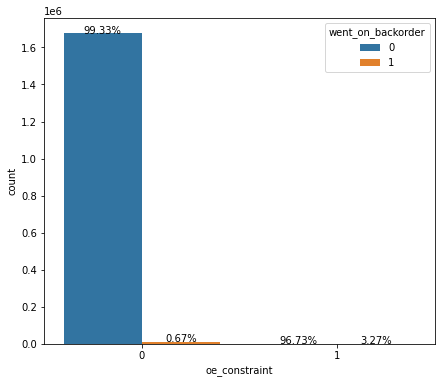

In [ ]:
plot_discrete('oe_constraint')

## Observations:
* Similar to other flags, most of the observations have oe_constraints is zero.
* Similar distribution of classes are observed across the values of oe_constraints.

## 6.4.ppap_risk

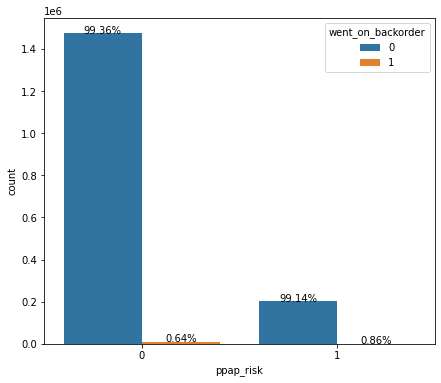

In [ ]:
plot_discrete('ppap_risk')

* Small percentage of observations have ppap_flag is 1.
* Observations belong to both classes are distributed similarly for each value of this flag.

## 6.5.stop_auto_buy

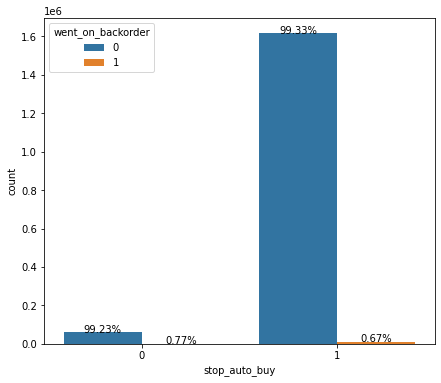

In [ ]:
plot_discrete('stop_auto_buy')

## Observations:
* For most of the observations, this flag is 1.
* As seen earlier,two classes of target are observed in equal percentages across each value  of this flag.

## 6.6.rev_stop

posx and posy should be finite values
posx and posy should be finite values


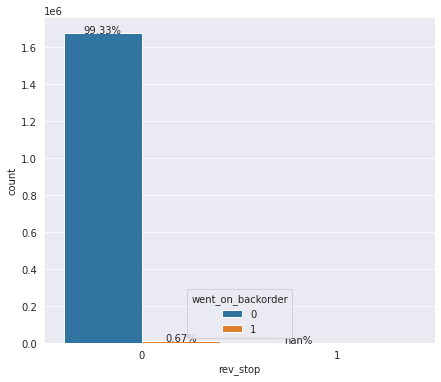

In [ ]:
plot_discrete('rev_stop')

In [ ]:
data[data['rev_stop']==1]['went_on_backorder'].value_counts()

0    731
Name: went_on_backorder, dtype: int64

### Observations:
* For majority of products, rev_stop flag is zero.
* All the products for which rev_flag=1, did go on backorder.

### Conclusions: Discrete Features:
* For majority of the observations, all flags except 'step_auto buy' were   zero.
* The 'step_auto_buy' flag is 1 for most of the observations.
* All the products for which rev_flag=1, did go on backorder.



---





## Conclusions:
* All features are rightly skewed.Features have large no of small values and a few no. of large values.
* There are missing values in 3 features and these values are common a small subset of observations .
* Some features are highly correlated to each other.
* There are large negative values in inventory, for which sales values are also high, but didn't went on backorder.
* Products that  keep lower inventory go on backorder, sales of such products are low.
* For products that went on backorder, values for all the features are typically low.
* Most of the observations have flags=0




---



---

